<a href="https://colab.research.google.com/github/nj19861/CE888/blob/main/Lab_7/Exercise_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [6]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [7]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [ ]:
model.compile(optimizer='rmsprop' ,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 46s 60ms/step - loss: 0.4440 - accuracy: 0.8570 - val_loss: 0.0668 - val_accuracy: 0.9795
Epoch 2/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0565 - accuracy: 0.9811 - val_loss: 0.0499 - val_accuracy: 0.9862
Epoch 3/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0582 - val_accuracy: 0.9822
Epoch 4/5
750/750 [==============================] - 44s 59ms/step - loss: 0.0255 - accuracy: 0.9913 - val_loss: 0.0369 - val_accuracy: 0.9892
Epoch 5/5
750/750 [==============================] - 44s 59ms/step - loss: 0.0204 - accuracy: 0.9941 - val_loss: 0.0419 - val_accuracy: 0.9887


#### evaluate model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 10ms/step - loss: 0.0287 - accuracy: 0.9917


0.9916999936103821

In [ ]:
history.history

{'accuracy': [0.9368333220481873,
  0.9836666584014893,
  0.9883124828338623,
  0.99197918176651,
  0.9934375286102295],
 'loss': [0.2029906064271927,
  0.05251378193497658,
  0.036306411027908325,
  0.02621767483651638,
  0.021249763667583466],
 'val_accuracy': [0.9766666889190674,
  0.9829166531562805,
  0.9884166717529297,
  0.9850833415985107,
  0.9901666641235352],
 'val_loss': [0.07709269225597382,
  0.05569395050406456,
  0.03774861991405487,
  0.05105099081993103,
  0.03849590942263603]}

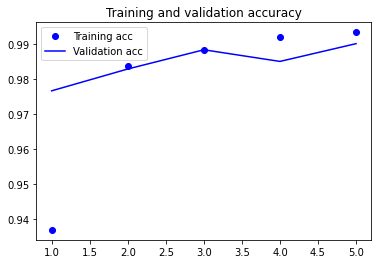

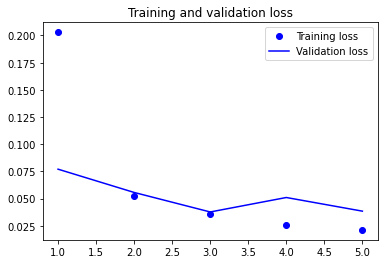

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [4]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
scorers = {
       
        'accuracy_score': make_scorer(accuracy_score)
        }

In [12]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD,RMSprop,Adam

def create_model(optimizer,lr):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
  
    if optimizer=='RMSprop':
      optimizer = RMSprop(lr=lr)
    elif optimizer=='Adam':
      optimizer = Adam(lr=lr)
    elif optimizer=='SGD':
      optimizer = SGD(lr=lr)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model


In [13]:
model  = create_model('RMSprop',0.1)

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 43s 56ms/step - loss: 1114.8925 - accuracy: 0.1025 - val_loss: 2.3079 - val_accuracy: 0.1035
Epoch 2/5
750/750 [==============================] - 42s 56ms/step - loss: 2.3107 - accuracy: 0.1038 - val_loss: 2.3233 - val_accuracy: 0.1060
Epoch 3/5
750/750 [==============================] - 42s 56ms/step - loss: 2.3101 - accuracy: 0.1055 - val_loss: 2.3140 - val_accuracy: 0.0998
Epoch 4/5
750/750 [==============================] - 42s 57ms/step - loss: 2.3104 - accuracy: 0.1050 - val_loss: 2.3130 - val_accuracy: 0.0956
Epoch 5/5
750/750 [==============================] - 42s 56ms/step - loss: 2.3106 - accuracy: 0.1031 - val_loss: 2.3104 - val_accuracy: 0.0989


In [14]:
model  = create_model('SGD',0.1)

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 43s 57ms/step - loss: 1.8451 - accuracy: 0.4390 - val_loss: 0.3315 - val_accuracy: 0.8971
Epoch 2/5
750/750 [==============================] - 42s 56ms/step - loss: 0.2975 - accuracy: 0.9109 - val_loss: 0.1905 - val_accuracy: 0.9428
Epoch 3/5
750/750 [==============================] - 43s 57ms/step - loss: 0.1887 - accuracy: 0.9422 - val_loss: 0.1676 - val_accuracy: 0.9473
Epoch 4/5
750/750 [==============================] - 43s 57ms/step - loss: 0.1399 - accuracy: 0.9569 - val_loss: 0.1238 - val_accuracy: 0.9619
Epoch 5/5
750/750 [==============================] - 41s 54ms/step - loss: 0.1172 - accuracy: 0.9632 - val_loss: 0.1065 - val_accuracy: 0.9697


In [9]:
"""
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD,RMSprop,Adam

model = create_model()
model = KerasClassifier(build_fn=create_model,  epochs=5, batch_size=64, verbose=1)
# define parameters and values for grid search 

param_grid = {'optimizer':['RMSprop','Adam','SGD']}
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(train_images, train_labels)  # fit the full dataset as
"""

Epoch 1/5
750/750 [==============================] - 42s 55ms/step - loss: 0.4506 - accuracy: 0.8583
Epoch 2/5
750/750 [==============================] - 41s 55ms/step - loss: 0.0566 - accuracy: 0.9806
Epoch 3/5
750/750 [==============================] - 42s 55ms/step - loss: 0.0380 - accuracy: 0.9880
Epoch 4/5
750/750 [==============================] - 42s 56ms/step - loss: 0.0270 - accuracy: 0.9909
Epoch 5/5
188/188 [==============================] - 3s 16ms/step - loss: 0.0381 - accuracy: 0.9899
Epoch 1/5
750/750 [==============================] - 41s 54ms/step - loss: 0.4610 - accuracy: 0.8508
Epoch 2/5
750/750 [==============================] - 40s 54ms/step - loss: 0.0570 - accuracy: 0.9818
Epoch 3/5
750/750 [==============================] - 41s 54ms/step - loss: 0.0370 - accuracy: 0.9880
Epoch 4/5
750/750 [==============================] - 41s 54ms/step - loss: 0.0273 - accuracy: 0.9911
Epoch 5/5
188/188 [==============================] - 3s 16ms/step - loss: 0.0358 - accuracy:

KeyboardInterrupt: ignored

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD,RMSprop,Adam


model = KerasClassifier(build_fn=create_model,  epochs=5, batch_size=64, verbose=0)
# define parameters and values for grid search 

param_grid = {'optimizer':['RMSprop','Adam','SGD'],'lr':np.linspace(0.1,1,10)}
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(train_images, train_labels)  # fit the full dataset as







KeyboardInterrupt: ignored